In [123]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

In [2]:
class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN,self).__init__()
        self.fc1 = nn.Linear(input_size, 50)
        self.fc2 = nn.Linear(50, num_classes)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [94]:
input_size = 1
num_classes = 1
learning_rate = 0.001
batch_size = 64
num_epochs = 100

In [125]:
x = np.linspace(0,1,50)
x = x.reshape(50,1)
x = torch.from_numpy(x)
data_test = x**2

x_test = np.linspace(0,1,500)
x_test = x_test.reshape(500,1)
np.random.shuffle(x_test)
x_test = torch.from_numpy(x_test)
data_train = x_test**2
train_loader = (x_test, data_train)

In [131]:
model = NN(input_size=input_size, num_classes=num_classes).to(device)


In [132]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [135]:
for epoch in range(num_epochs):
    for i in range(len(data_train)):
        #Gat data to cuda if possible
        targets = data_train[i]
        
        # forward
        scores = model(x_test[i].float())
        loss = criterion(scores, targets.float())
        
        # backward prop
        optimizer.zero_grad()
        loss.backward()
        
        # gradient descent or adam step
        optimizer.step()
        
        if epoch % 10 == 0 and i == 0:
            print(f'Epoch {epoch}: Loss = {loss.item():.4f}')

Epoch 0: Loss = 0.0000
Epoch 10: Loss = 0.0000
Epoch 20: Loss = 0.0000
Epoch 30: Loss = 0.0000
Epoch 40: Loss = 0.0000
Epoch 50: Loss = 0.0000
Epoch 60: Loss = 0.0000
Epoch 70: Loss = 0.0000
Epoch 80: Loss = 0.0000
Epoch 90: Loss = 0.0000


In [138]:
y_test = model(x.float())

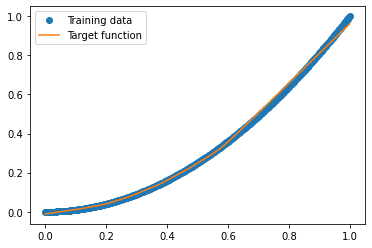

In [140]:
# Plot the results
plt.plot(x_test.detach().numpy(), data_train.detach().numpy(), 'o', label='Training data')
plt.plot(x.detach().numpy(), y_test.detach().numpy(), label='Target function')
plt.legend()
plt.show()